In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline
np.set_printoptions(suppress=True)

from jne_functions import *
from ipywidgets import interactive, FloatSlider
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score

In [2]:
df=pd.read_csv('bank_marketing_modified.csv')
df

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,month,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit,age_group,season
0,0,56,housemaid,married,basic.4y,no,no,no,telephone,may,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,Middle-aged,spring
1,1,57,services,married,high.school,unknown,no,no,telephone,may,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,Middle-aged,spring
2,2,37,services,married,high.school,no,yes,no,telephone,may,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,Adult,spring
3,3,40,admin.,married,basic.6y,no,no,no,telephone,may,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,Middle-aged,spring
4,4,56,services,married,high.school,no,no,yes,telephone,may,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,Middle-aged,spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,41183,73,retired,married,professional.course,no,yes,no,cellular,nov,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1,Senior,fall
41184,41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,Middle-aged,fall
41185,41185,56,retired,married,university.degree,no,yes,no,cellular,nov,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,Middle-aged,fall
41186,41186,44,technician,married,professional.course,no,no,no,cellular,nov,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1,Middle-aged,fall


In [3]:
X=df.loc[:,['campaign','previous','emp.var.rate',
            'cons.price.idx','cons.conf.idx','euribor3m',
            'nr.employed','job','marital','education',
            'default','housing','loan','month','day_of_week','pdays','age_group']]
y=df['deposit']

In [4]:
param_grid={'classifier__bootstrap': [True, False],
            'classifier__max_depth': [10,25,None],
            'classifier__max_features': ['sqrt'],
            'classifier__min_samples_leaf': [10, 20, 40],
            'classifier__min_samples_split': [45,50,60],
            'classifier__n_estimators':[150,200,250,300]}
classifiers_no_stan(RandomForestClassifier(class_weight='balanced_subsample',n_jobs=-1),param_grid,X,y)

{'classifier__n_estimators': 150,
 'classifier__min_samples_split': 45,
 'classifier__min_samples_leaf': 10,
 'classifier__max_features': 'sqrt',
 'classifier__max_depth': None,
 'classifier__bootstrap': True}

In [5]:
from jne_functions import rand_s, X_train, X_test, y_train, y_test
confusion_matrix(y_test, rand_s.predict(X_test))

array([[6024, 1286],
       [ 460,  468]])

In [6]:
interactive(lambda threshold: make_confusion_matrix(rand_s, threshold), threshold=(0.0,1.0,0.02))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.02), Output()), _dom_cla…

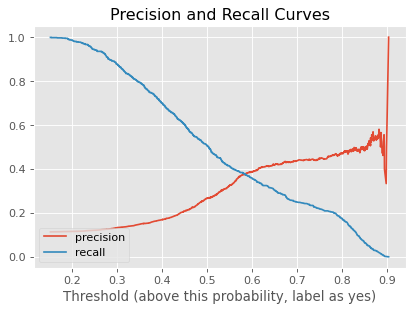

In [8]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, rand_s.predict_proba(X_test)[:,1] )
plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as yes)');
plt.title('Precision and Recall Curves');

In [9]:
y_predict = rand_s.predict(X_test)
f1_score(y_test, y_predict,average='macro')

0.6112082580404087

In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.93      0.82      0.87      7310
           1       0.27      0.50      0.35       928

    accuracy                           0.79      8238
   macro avg       0.60      0.66      0.61      8238
weighted avg       0.85      0.79      0.81      8238



In [11]:
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(y_test, rand_s.predict_proba(X_test)[:,1])

ROC AUC score =  0.7041710399075429


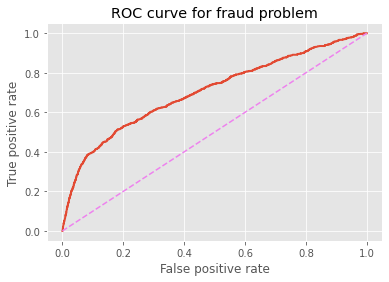

In [12]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for fraud problem');
print("ROC AUC score = ", roc_auc_score(y_test, rand_s.predict_proba(X_test)[:,1]))

In [27]:
param_grid={'classifier__bootstrap': [True],
            'classifier__max_depth': [25,None],
            'classifier__max_features': ['sqrt'],
            'classifier__min_samples_leaf': [10, 20, 40],
            'classifier__min_samples_split': [20, 30, 40, 50]}
classifiers_no_stan_oversample(RandomForestClassifier(class_weight='balanced_subsample',n_jobs=-1),param_grid,X,y)

{'classifier__min_samples_split': 40,
 'classifier__min_samples_leaf': 20,
 'classifier__max_features': 'sqrt',
 'classifier__max_depth': None,
 'classifier__bootstrap': True}

In [28]:
from jne_functions import rand_s, X_train, X_test, y_train, y_test
confusion_matrix(y_test, rand_s.predict(X_test))

array([[6534,  776],
       [ 569,  359]])

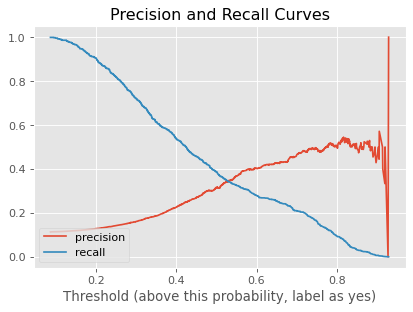

In [29]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, rand_s.predict_proba(X_test)[:,1] )
plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as yes)');
plt.title('Precision and Recall Curves');

In [30]:
y_predict = rand_s.predict(X_test)
f1_score(y_test, y_predict,average='macro')

0.6273591538365533

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91      7310
           1       0.34      0.37      0.35       928

    accuracy                           0.85      8238
   macro avg       0.63      0.64      0.63      8238
weighted avg       0.85      0.85      0.85      8238



ROC AUC score =  0.6989526333789329


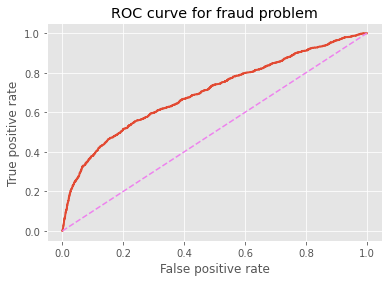

In [26]:
fpr, tpr, thresholds = roc_curve(y_test, rand_s.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for fraud problem');
print("ROC AUC score = ", roc_auc_score(y_test, rand_s.predict_proba(X_test)[:,1]))